# Developing Well Calibrated Illness Severity Scores
## Cohort Overviews (for manuscript)
### C.V. Cosgriff, MIT Critical Data

## 0 - Environment Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

## 1 - Load Cohorts

In [2]:
# full training
train_X_full = pd.read_csv('../extraction/data/train_X.csv').set_index('patientunitstayid')
train_y_full = pd.read_csv('../extraction/data/train_y.csv').values.ravel()
train_apache_full = pd.read_csv('../extraction/data/train_apache.csv').values.ravel()
train_sofa_full = pd.read_csv('../extraction/data/train_sofa.csv').values.ravel()

# HR cohort
train_X_HR = train_X_full.loc[(train_apache_full >= 0.10), :] 
train_y_HR = train_y_full[(train_apache_full >= 0.10)]
train_apache_HR = train_apache_full[(train_apache_full >= 0.10)]
train_sofa_HR = train_sofa_full[(train_apache_full >= 0.10)]

# RS cohort
np.random.seed(seed=42)
sample_index = np.random.choice(np.arange(0, train_X_full.shape[0]), size=train_y_HR.shape[0])
train_X = train_X_full.iloc[sample_index, :]
train_y = train_y_full[sample_index]
train_apache = train_apache_full[sample_index]
train_sofa = train_sofa_full[sample_index]

# testing cohort
test_X = pd.read_csv('../extraction/data/test_X.csv').set_index('patientunitstayid')
test_y = pd.read_csv('../extraction/data/test_y.csv').values.ravel()
test_apache = pd.read_csv('../extraction/data/test_apache.csv').values.ravel()
test_sofa = pd.read_csv('../extraction/data/test_sofa.csv').values.ravel()
test_X_HR = test_X.loc[(test_apache >= 0.10), :]
test_y_HR = test_y[test_apache >= 0.10]
test_apache_HR = test_apache[test_apache >= 0.10]
test_sofa_HR = test_sofa[test_apache >= 0.10]

## 2 - Choosing Measures of Central Tendency

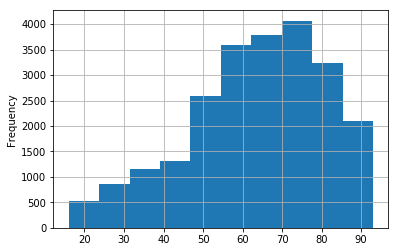

In [3]:
train_X.age.plot(kind='hist', grid=True)

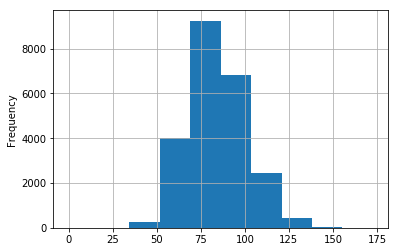

In [4]:
train_X.hr_mean.plot(kind='hist', grid=True)

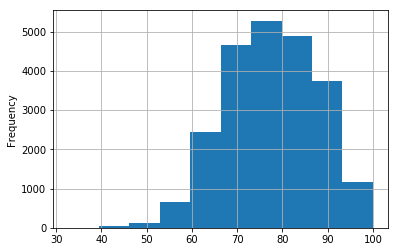

In [5]:
train_X.map_aperiodic_mean.plot(kind='hist', grid=True)

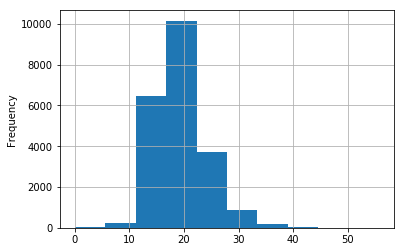

In [6]:
train_X.rr_mean.plot(kind='hist', grid=True)

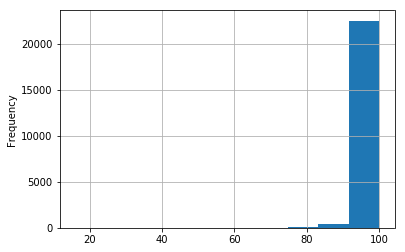

In [7]:
train_X.spo2_mean.plot(kind='hist', grid=True)

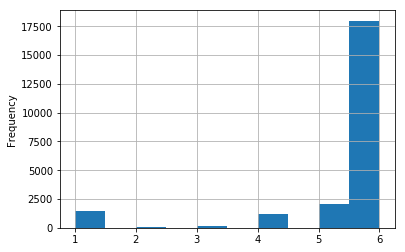

In [8]:
train_X.gcs_motor.plot(kind='hist', grid=True)

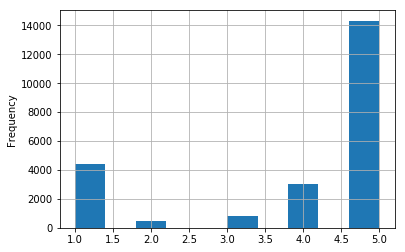

In [9]:
train_X.gcs_verbal.plot(kind='hist', grid=True)

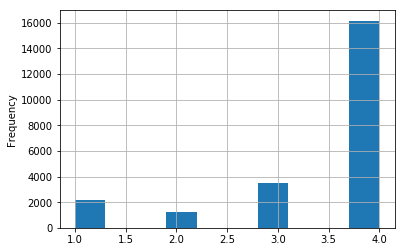

In [10]:
train_X.gcs_eyes.plot(kind='hist', grid=True)

## 3 - Training Cohort Tables

In [11]:
def iqr(var):
    return (round(var.quantile(0.25), 3), round(var.quantile(0.75), 3))

def print_demographics(cohort):
    data = {'mean (or prop)' : [round(cohort.age.mean(), 3), round(cohort.male_gender.mean(), 3), round(cohort.eth_caucasian.mean(), 3)],
            'std' : [round(cohort.age.std(), 3), np.nan, np.nan]}
    display(pd.DataFrame(data, index=['Age', 'Gender Prop.', 'Caucasian Ethnicity']))
    
def print_vs_params(cohort):
    data = {'mean (median for SpO2)' : [round(cohort.hr_mean.mean(), 3), round(cohort.map_aperiodic_mean.mean(), 3), round(cohort.rr_mean.mean(), 3), round(cohort.spo2_mean.median(), 3)],
            'std (IQR for SpO2)' : [round(cohort.hr_mean.std(), 3), round(cohort.map_aperiodic_mean.std(), 3), round(cohort.rr_mean.std(), 3), iqr(cohort.spo2_mean)]}
    display(pd.DataFrame(data, index=['Mean HR', 'Mean MAP', 'Mean RR', 'Mean SpO2']))
    
def print_gcs_params(cohort):
    data = {'median' : [round(cohort.gcs_motor.median(), 3), round(cohort.gcs_eyes.median(), 3), round(cohort.gcs_verbal.median(), 3)],
            'IQR' : [iqr(cohort.gcs_motor), iqr(cohort.gcs_eyes), iqr(cohort.gcs_verbal)]}
    display(pd.DataFrame(data, index=['GCS Motor', 'GCS Eyes', 'GCS Verbal']))
    
def print_tx_params(cohort):
    data = {'prop' : [round(cohort.pressor.mean(), 3), round(cohort.abx.mean(), 3), round(cohort.apache_ventday1.mean(), 3)]}
    display(pd.DataFrame(data, index=['Pressor', 'Abx', 'Vent']))

In [12]:
print_demographics(train_X)
print_vs_params(train_X)
print_gcs_params(train_X)
print_tx_params(train_X)

print_demographics(train_X_HR)
print_vs_params(train_X_HR)
print_gcs_params(train_X_HR)
print_tx_params(train_X_HR)

print_demographics(test_X_HR)
print_vs_params(test_X_HR)
print_gcs_params(test_X_HR)
print_tx_params(test_X_HR)

,mean (or prop),std
Age,63.488,17.394
Gender Prop.,0.541,NaN
Caucasian Ethnicity,0.763,NaN


,mean (median for SpO2),std (IQR for SpO2)
Mean HR,84.251,16.467
Mean MAP,77.477,10.11
Mean RR,19.272,4.687
Mean SpO2,97.086,"(95.551, 98.481)"


,median,IQR
GCS Motor,6.0,"(6.0, 6.0)"
GCS Eyes,4.0,"(3.0, 4.0)"
GCS Verbal,5.0,"(4.0, 5.0)"


,prop
Pressor,0.123
Abx,0.257
Vent,0.341


,mean (or prop),std
Age,70.791,15.647
Gender Prop.,0.522,NaN
Caucasian Ethnicity,0.773,NaN


,mean (median for SpO2),std (IQR for SpO2)
Mean HR,87.872,17.994
Mean MAP,74.474,10.186
Mean RR,20.367,5.283
Mean SpO2,97.225,"(95.489, 98.711)"


,median,IQR
GCS Motor,6.0,"(4.0, 6.0)"
GCS Eyes,3.0,"(2.0, 4.0)"
GCS Verbal,3.0,"(1.0, 5.0)"


,prop
Pressor,0.213
Abx,0.332
Vent,0.600


,mean (or prop),std
Age,70.983,15.317
Gender Prop.,0.519,NaN
Caucasian Ethnicity,0.780,NaN


,mean (median for SpO2),std (IQR for SpO2)
Mean HR,88.055,17.822
Mean MAP,74.251,10.257
Mean RR,20.314,5.211
Mean SpO2,97.185,"(95.473, 98.686)"


,median,IQR
GCS Motor,6.0,"(4.0, 6.0)"
GCS Eyes,3.0,"(2.0, 4.0)"
GCS Verbal,3.0,"(1.0, 5.0)"


,prop
Pressor,0.216
Abx,0.335
Vent,0.602


In [13]:
disease_severity = {'mean' : [round(train_sofa.mean(), 3), round(train_sofa_HR.mean(), 3), round(test_sofa_HR.mean(), 3)],
                    'std' : [round(train_sofa.std(), 3), round(train_sofa_HR.std(), 3), round(test_sofa_HR.std(), 3)]}
display(pd.DataFrame(disease_severity, index=['RS Cohort', 'HR Cohort', 'Testing Cohort']))

,mean,std
RS Cohort,4.874,3.319
HR Cohort,7.153,3.464
Testing Cohort,7.223,3.453


In [14]:
apache_pred = {'mean' : [round(train_apache.mean(), 3), round(train_apache_HR.mean(), 3), round(test_apache_HR.mean(), 3)],
                    'std' : [round(train_apache.std(), 3), round(train_apache_HR.std(), 3), round(test_apache_HR.std(), 3)]}
display(pd.DataFrame(apache_pred, index=['RS Cohort', 'HR Cohort', 'Testing Cohort']))

,mean,std
RS Cohort,0.122,0.169
HR Cohort,0.294,0.204
Testing Cohort,0.295,0.203
